In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

#to scale the data using z-score
from sklearn.preprocessing import StandardScaler

#Importing PCA and TSNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data= pd.read_csv("/content/drive/My Drive/MIT/Making Sense of Unstructured Data/Country-data.csv")

In [ ]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## Preprocessing

t-SNE can onlybe performed with continuous or numerical variables. The country variable here is categorical and should be left out during the dimensionality reduction process.

A categorical variable can be converted to numerical through one hot encoding orsimilar technique.

However for this case,the country column contains uniques variable and may not provide further information to the analysis.

In [ ]:
data.shape

(167, 10)

In [ ]:
data.country.nunique()

167

In [ ]:
# Assume the first column is 'Country' and the rest are socio-economic indicators
features = data.iloc[:, 1:]
countries = data['country']

# Normalize the data
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)


## Dimensions
Choose 2 components for ease of displaying the results on a 2d graph.

In [ ]:
# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=42)
tsne_results = tsne.fit_transform(normalized_features)

# Create a DataFrame with t-SNE results
tsne_df = pd.DataFrame(tsne_results, columns=['Dimension 1', 'Dimension 2'])
tsne_df['Country'] = countries

# Check the first few rows of the t-SNE result DataFrame
print(tsne_df.head())


   Dimension 1  Dimension 2              Country
0    -8.790294     6.888013          Afghanistan
1     2.551190    -0.178307              Albania
2     1.791506     4.747705              Algeria
3    -7.740858     4.455073               Angola
4     3.650127    -2.326588  Antigua and Barbuda


## Interpret Dimensions
Understanding what makes up a dimension in t-SNE is more abstract compared to linear dimensionality reduction techniques like PCA. t-SNE is a non-linear technique that doesn't provide explicit component loadings or feature contributions.

We could use a correlation matrix to gain insights into what might be influencing the t-SNE dimensions.Strong correlations (positive or negative) indicate that a particular feature has a significant relationship with the t-SNE dimensions.

Imports and inflation have an insignificant relationship with dimension 1

Health and exports have a more significant relationship with dimension 2 than dimension 1.

In [ ]:
# Combine with original features for correlation analysis
combined_df = pd.concat([tsne_df, features.reset_index(drop=True)], axis=1)

# Calculate correlations
correlation_matrix = combined_df.corr(numeric_only=True)
correlation_matrix

,Dimension 1,Dimension 2,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Dimension 1,1.000000,-0.777359,-0.823078,0.302499,0.257721,-0.012804,0.753339,-0.197285,0.885446,-0.808225,0.742207
Dimension 2,-0.777359,1.000000,0.780395,-0.481926,-0.443258,-0.387391,-0.579627,0.416918,-0.756809,0.744475,-0.616703
child_mort,-0.823078,0.780395,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,0.302499,-0.481926,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,0.257721,-0.443258,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.012804,-0.387391,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,0.753339,-0.579627,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,-0.197285,0.416918,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,0.885446,-0.756809,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,-0.808225,0.744475,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910


## Visualize
We can see the countries grouped by how similar their socio-economic factors are.

With the scatter plot we can see that;

*   some countries exhibit more the characteristics of dimension 2 than dimension 1
*   some countries exhibit more of dimension 1 and 2
*   some countries exhibit characteristics of both dimensions averagely


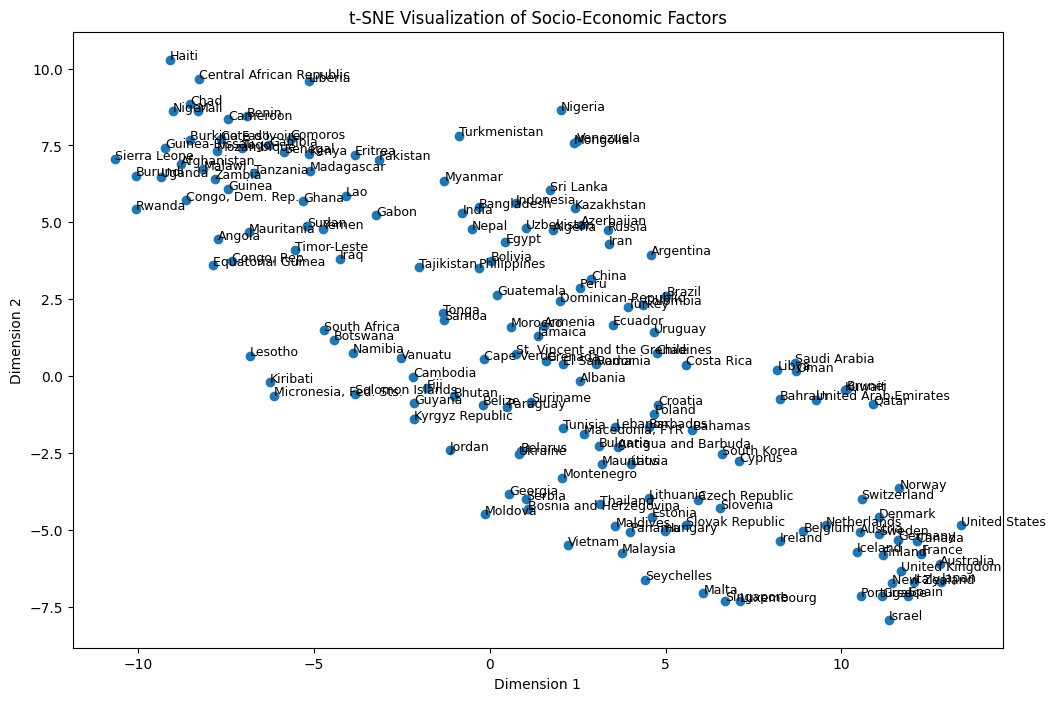

In [ ]:
# Plot the t-SNE results
plt.figure(figsize=(12, 8))
plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'])
for i, country in enumerate(tsne_df['Country']):
    plt.text(tsne_df['Dimension 1'][i], tsne_df['Dimension 2'][i], country, fontsize=9)
plt.title('t-SNE Visualization of Socio-Economic Factors')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

## Visualize
With map of the world we can see where these clusters are. Countries in South America, Africa, Eastern Europe,Western Europe tend to exhibit almost similar characteristics based on the region. They are shown to belong to the same group.

We can also see some of the countries that are outliers in their regions.

<ipython-input-60-c948bda0c832>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
<ipython-input-60-c948bda0c832>:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(world_tsne.geometry.centroid.x, world_tsne.geometry.centroid.y, world_tsne['Country']):


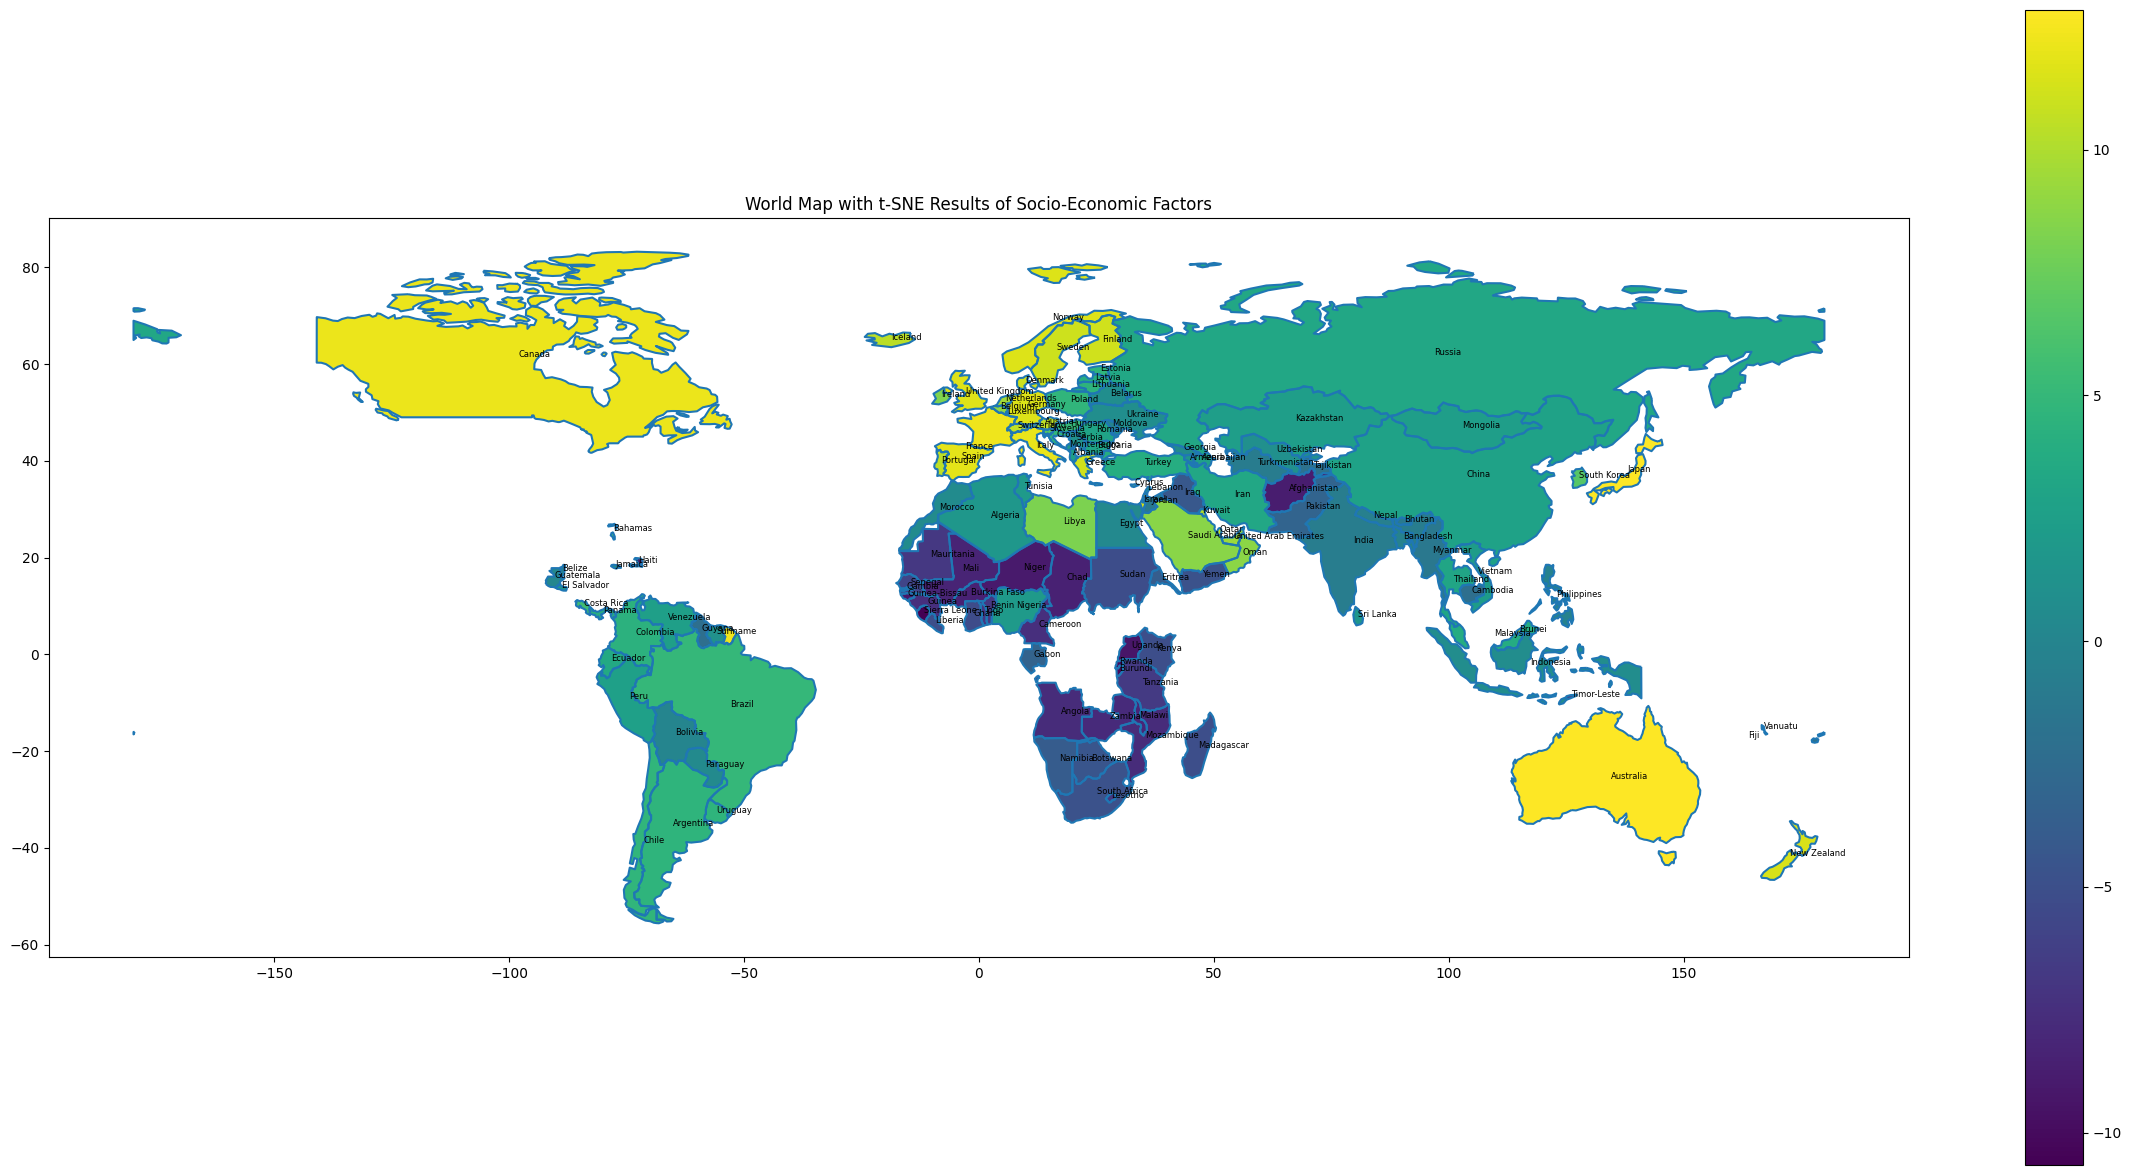

In [ ]:
# Load world map shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge t-SNE results with the world map GeoDataFrame
world_tsne = world.merge(tsne_df, how='inner', left_on='name', right_on='Country')

# Plot the world map with t-SNE results
fig, ax = plt.subplots(1, 1, figsize=(30, 15))
world_tsne.boundary.plot(ax=ax)
world_tsne.plot(column='Dimension 1', ax=ax, legend=True, cmap='viridis', missing_kwds={'color': 'lightgrey'})

# Annotate the map with country names
for x, y, label in zip(world_tsne.geometry.centroid.x, world_tsne.geometry.centroid.y, world_tsne['Country']):
    ax.text(x, y, label, fontsize=6)

plt.title('World Map with t-SNE Results of Socio-Economic Factors')
plt.show()


## Clustering
To get a better understanding of the groupings we can use a clustering mechanism and use average measures of the numeric variable to interpret the characteristics of countries that belong to similar socio-economic groups.

We can begin by identifying how many clusters should be obtained from the data using the elbow method. We find it to be 3 i.e. there is not a lot of variation when we increase the number of clusters to more than 3.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

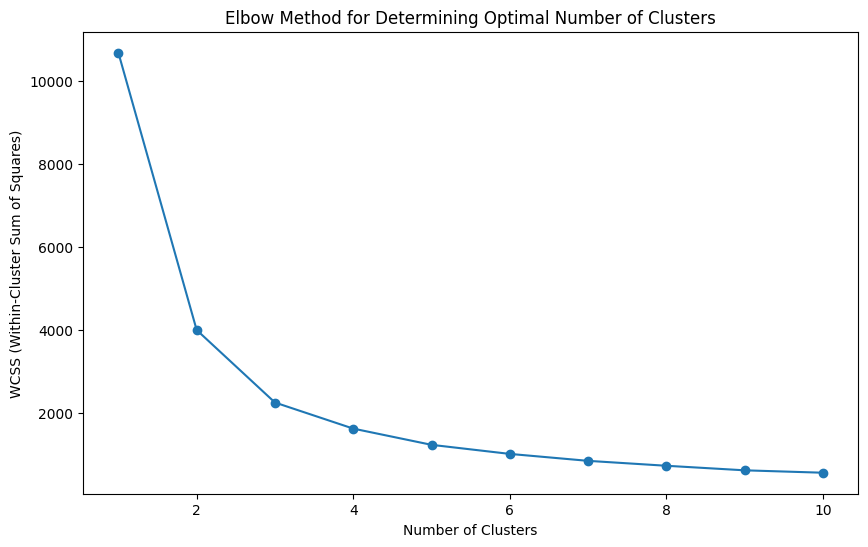

In [ ]:
# Define the range of clusters to try
num_clusters = range(1, 11)

# List to store the WCSS for each number of clusters
wcss = []

# Calculate WCSS for each number of clusters
for k in num_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tsne_results)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(num_clusters, wcss, marker='o')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

## K-Means Visualization
We see that most of the countries fall under the second cluster.

Oil exporting countries such as Libya and Saudi Arabia fall in cluster one.

Most African countries are in cluster 0.

We still do not know what the clusters represent, we will do an anlysis of the averages of the properties.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-62-a9d90bcdbaa6>:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
<ipython-input-62-a9d90bcdbaa6>:23: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label, cluster in zip(world_tsne.geometry.centroid.x, world_tsne.geometry.centroid.y, world_tsne['Country'], world_tsne['Cluster']):


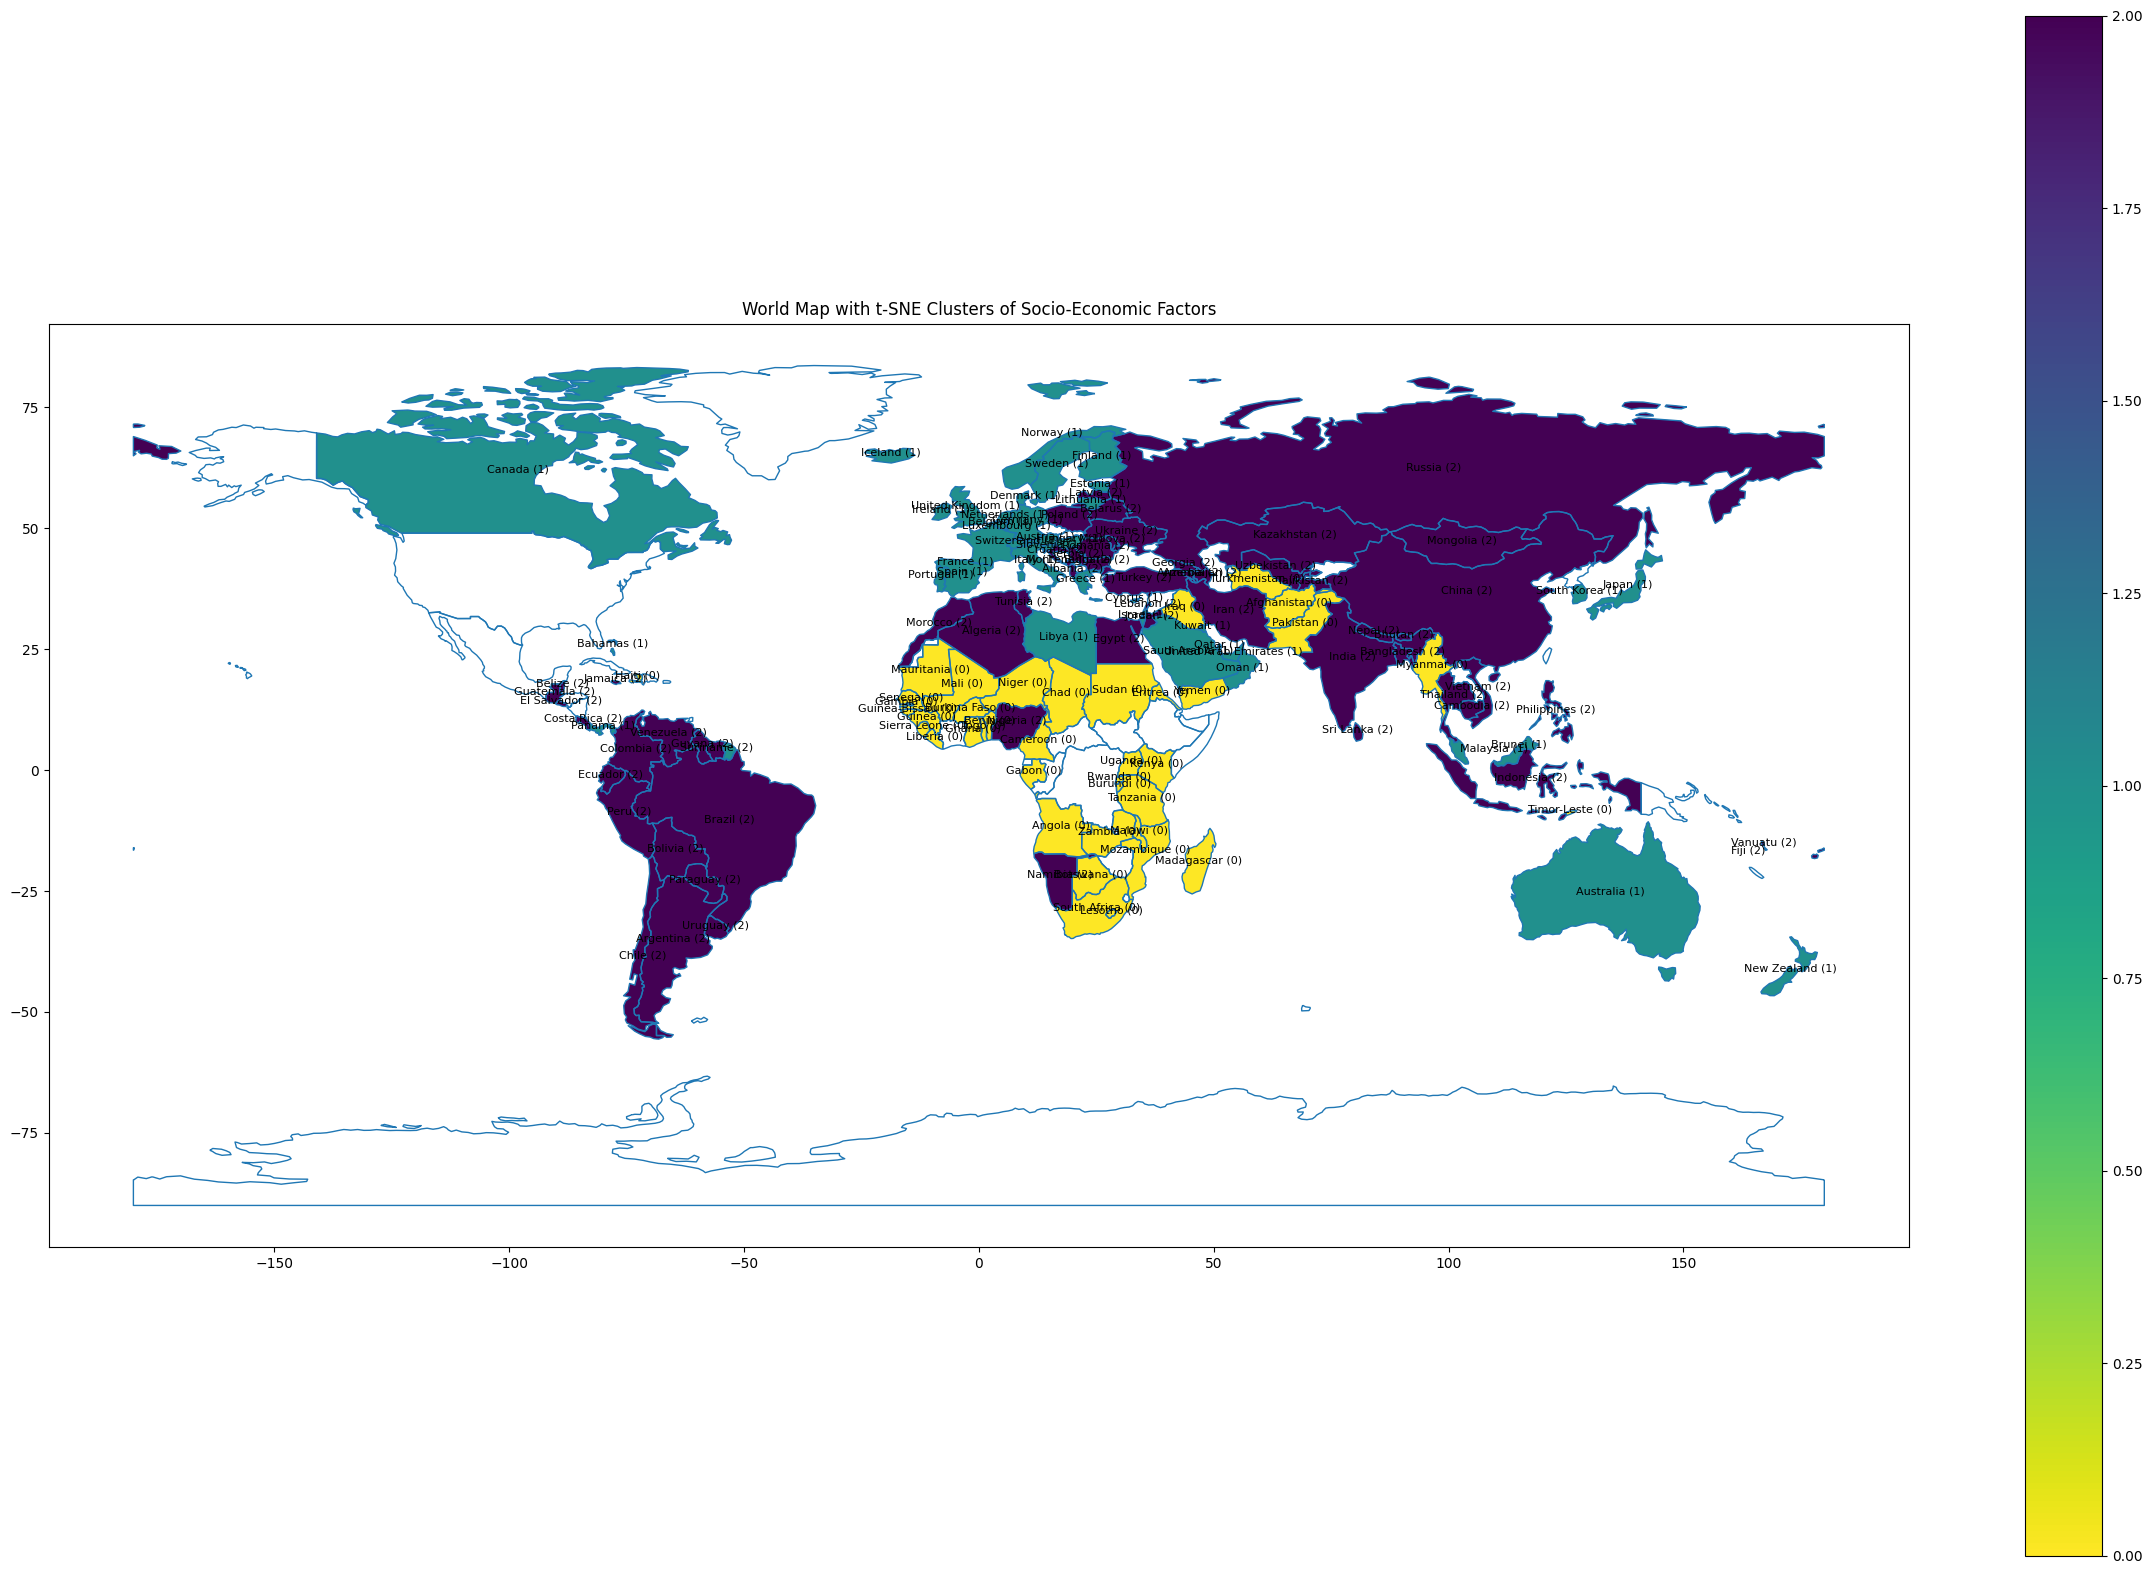

In [ ]:
from sklearn.cluster import KMeans

# Apply K-Means clustering to the t-SNE results
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(tsne_results)
tsne_df = pd.DataFrame(tsne_results, columns=['Dimension 1', 'Dimension 2'])
tsne_df['Country'] = countries
tsne_df['Cluster'] = clusters

# Load world map shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge t-SNE results with the world map GeoDataFrame
world_tsne = world.merge(tsne_df, how='inner', left_on='name', right_on='Country')

# Plot the world map with t-SNE cluster results
fig, ax = plt.subplots(1, 1, figsize=(30, 20))
world.boundary.plot(ax=ax, linewidth=1)
world_tsne.dropna(subset=['Cluster']).plot(column='Cluster', ax=ax, legend=True, cmap='viridis_r', missing_kwds={'color': 'lightgrey'})

# Annotate the map with country names and cluster labels, only for those with cluster data
texts = []
for x, y, label, cluster in zip(world_tsne.geometry.centroid.x, world_tsne.geometry.centroid.y, world_tsne['Country'], world_tsne['Cluster']):
    if pd.notna(cluster):
        ax.text(x, y, f"{label} ({int(cluster)})", fontsize=8, ha='center')


plt.title('World Map with t-SNE Clusters of Socio-Economic Factors')
plt.show()

## Cluster Analysis
The countries in cluster 2 exhibit average outcome in the factors analysed;
*   child mortality is neither too low nor too high
*   import to export rations are also neither too high nor too low
*   life expectancy is close to those in cluster 1
*   inflation is close to those in cluster 0

Countries in cluster 0
*   have very high child mortality rates, high fertility rates and a low life expectancy
*   they import more than they export
*   people receive low income and the countries have low GDP per capita on average
*   have the highest rate of inflation

Countries in cluster 1 are the opposite of those in cluster 0
*   have very low child mortality rates, low fertility rates and a high life expectancy
*   they export more than they import
*   people receive high income and the countries have high GDP per capita on average
*   have the lowest rate of inflation
*   people living in these countries have a higher spend on health compared to the other clusters.









In [ ]:
# Merge the cluster labels with the original data
pd.set_option('display.width', 500)
clustered_data = pd.concat([data, tsne_df['Cluster']], axis=1)
clustered_data.head()
# Calculate descriptive statistics for each cluster
cluster_stats = clustered_data.groupby('Cluster').mean(numeric_only=True)
print(cluster_stats)

# Compare clusters
for cluster in clustered_data['Cluster'].unique():
    print(f'\nCluster {cluster} Characteristics:')
    print(clustered_data[clustered_data['Cluster'] == cluster].describe().transpose())

# Example of cluster summary
cluster_summary = {}
for cluster in clustered_data['Cluster'].unique():
    cluster_summary[cluster] = {
        'Countries': clustered_data[clustered_data['Cluster'] == cluster]['country'].tolist(),
        'Characteristics': clustered_data[clustered_data['Cluster'] == cluster].mean(numeric_only=True).to_dict()
    }

# Print summary of each cluster
for cluster, summary in cluster_summary.items():
    print(f'\nCluster {cluster}:')
    print(f'Countries: {", ".join(summary["Countries"])}')
    print(f'Characteristics: {summary["Characteristics"]}')


         child_mort    exports   health    imports        income  inflation  life_expec  total_fer          gdpp
Cluster                                                                                                         
0         90.616667  29.102479  6.39750  42.430540   3930.895833   9.802396   59.641667   4.888333   1898.333333
1          6.587234  61.297872  8.05383  54.227660  40870.212766   3.356426   79.000000   1.848298  35813.829787
2         24.054167  35.934444  6.28625  45.073611  10466.388889   9.323597   72.319444   2.372222   5425.611111

Cluster 0 Characteristics:
            count         mean          std       min        25%       50%        75%       max
child_mort   48.0    90.616667    33.522633   36.9000    63.6750    88.750   111.0000    208.00
exports      48.0    29.102479    19.519116    0.1090    16.7250    23.650    37.6000     85.80
health       48.0     6.397500     2.988412    1.9700     4.4775     5.480     8.3275     14.20
imports      48.0    42

## Conclusion
We can now give names to clusters
*   cluster 0 - low income countries
*   cluster 1 - high income countries
*   cluster 2 - middle income countries

With this analyses you can begin to see the differences in countries from the same region, for example, there are countries in  Africa that are considered high income based on this dataset despite the common knowledge that African countries are low income.

We can see that countries in the same region tend to have similar socio-economic factors.

Notice, that some countries have no representation on the map i.e. no data was available for these countries. However we can extend this analysis to begin predicting where these countries would fall if given their data.

t-SNE only serves to identify the groupings that exist and is not a tool for prediction.